In [1]:
import torch
from torch_geometric.loader import DataLoader
from data_creation import create_dataset, to_pyg_data
from models.EdgeClassifier import EdgeClassNet
from torch.optim import Adam

c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# run only if new data is desired
ode_dim = 2
n_data = 4
x_exact, x_train, y_train, param = create_dataset(ode_dim,n_data,50000)

dataset = []
for i in range(0,len(x_train)):

    y = torch.zeros(len(y_train[i]))
    for j in range(0,len(y_train[i])):
        if y_train[i][j] > 0.0001:
            y[j] = 1
        if y_train[i][j] < -0.0001:
            y[j] = 2
    y = y.long()
    dataset.append(to_pyg_data(x_train[i],y,ode_dim,n_data))

loader = DataLoader(dataset,batch_size=64,shuffle=True)

x_text_exact, x_test, y_test, param_test = create_dataset(ode_dim,n_data,128)

dataset = []
for i in range(0,len(x_test)):
    y = torch.zeros(len(y_test[i]))
    for j in range(0,len(y_test[i])):
        if y_test[i][j] > 0.0001:
            y[j] = 1
        if y_test[i][j] < -0.0001:
            y[j] = 2
    y = y.long()
    dataset.append(to_pyg_data(x_test[i],y,ode_dim,n_data))

test_loader = DataLoader(dataset,batch_size=128,shuffle=True)

KeyboardInterrupt: 

In [ ]:
model = EdgeClassNet(n_data, 20, ode_dim ** 2, 1)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()  # or MSELoss for regression
class_loss = torch.nn.NLLLoss()
reg = torch.nn.L1Loss()

train_loss = []
test_loss = []

# Training loop
for epoch in range(3000):
    model.train()

    tr_loss = 0
    for data in loader:
        optimizer.zero_grad()
        out = model(data)

        loss = class_loss(out,data.y)
        # loss = loss + 0.0001*reg(out.flatten(),0*out.flatten())
        train_loss.append(loss)

        loss.backward()
        optimizer.step()
        
        tr_loss += loss

    print(tr_loss.item())

    
    with torch.no_grad():
        for data in test_loader:
            out = model(data)
            loss = class_loss(out,data.y)
            # print(loss.item())
            test_loss.append(loss)

723.7312622070312
697.13427734375
693.0218505859375
691.099365234375
689.3858642578125
687.5721435546875
681.7815551757812
678.0993041992188
676.6869506835938
675.1727294921875
673.8125
671.7059936523438
668.6998291015625
662.8195190429688
659.0933227539062
657.3132934570312
655.5196533203125
654.158447265625
653.3236694335938
652.3907470703125
651.3429565429688
650.0945434570312
648.5472412109375
647.187744140625
646.1226806640625
643.7410888671875
642.3712158203125
641.1834716796875
640.5330200195312
639.5079956054688
637.8199462890625
637.7570190429688
636.8612060546875
636.2184448242188
635.6771240234375
634.9885864257812
635.1245727539062
634.5805053710938
634.2886352539062
633.8816528320312
633.7521362304688
632.70361328125
632.8446044921875
632.1558227539062
631.8756713867188
631.7188720703125
631.4088134765625
631.3629150390625
631.412841796875
630.8449096679688
630.3485717773438
630.5936889648438
630.0763549804688
629.2529296875
629.3402099609375
629.166015625
628.8642578125
6

KeyboardInterrupt: 

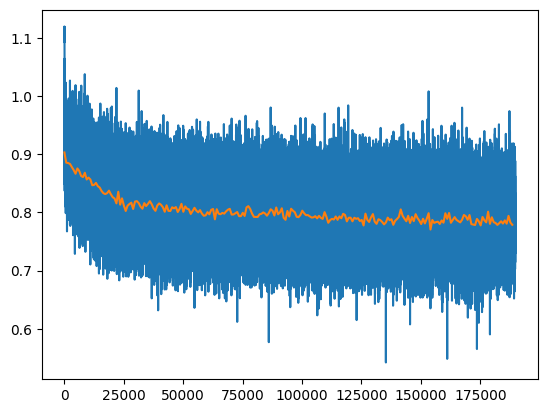

tensor([ 0.,  1.,  0., -1.])
tensor([-1.,  1., -1., -1.])
tensor([1., 0., 0., 0.])
tensor([0., 1., 1., 0.])
tensor([-1.,  0., -1.,  1.])
tensor([-1.,  0., -1., -1.])
tensor([1., 0., 0., 1.])
tensor([1., 0., 1., 0.])
tensor([-1.,  0.,  0., -1.])
tensor([1., 1., 0., 1.])
tensor([ 0., -1.,  1., -1.])
tensor([-1., -1.,  0., -1.])
tensor([ 0., -1., -1., -1.])
tensor([-1., -1.,  0.,  1.])
tensor([ 0., -1., -1.,  0.])
tensor([-1.,  1.,  0., -1.])
tensor([-1.,  1., -1.,  0.])
tensor([ 1.,  0.,  1., -1.])
tensor([-1.,  0.,  0.,  1.])
tensor([-1.,  1.,  1.,  1.])
tensor([ 1.,  0.,  0., -1.])
tensor([-1.,  1.,  0.,  1.])
tensor([-1., -1.,  1.,  1.])
tensor([ 0.,  1., -1.,  0.])
tensor([0., 1., 0., 1.])
tensor([ 1.,  0., -1., -1.])
tensor([-1.,  0.,  0.,  0.])
tensor([ 0.,  1.,  1., -1.])
tensor([1., 1., 0., 1.])
tensor([-1., -1.,  1.,  1.])
tensor([0., 1., 1., 1.])
tensor([-1.,  0.,  1.,  1.])
tensor([ 0., -1., -1.,  1.])
tensor([1., 0., 0., 1.])
tensor([0., 1., 1., 0.])
tensor([-1.,  0., -1.,  0

In [ ]:
import matplotlib.pyplot as plt

def get_adjacency(W):
        values_log_W = torch.sort(torch.log(torch.abs(W.flatten())))[0]
        treshold = values_log_W[torch.sort(values_log_W[1:] - values_log_W[:-1])[1][-1] + 1]
        W_bool_activation = (W >= torch.exp(treshold)).double()
        W_bool_repr = (W <= -torch.exp(treshold)).double()
        A = W_bool_activation-W_bool_repr
        return A

tr_l = [train_loss[i].to('cpu').detach().numpy() for i in range(0,len(train_loss))]
tst_l = [test_loss[i].to('cpu').detach().numpy() for i in range(0,len(test_loss))]
plt.plot(range(0,len(tr_l)),tr_l)
plt.plot(range(0,len(loader)*len(tst_l),len(loader)),tst_l)
plt.show()

x_val_exact, x_val, y_val, param_val = create_dataset(ode_dim,n_data,1000)

val_dataset = []

for i in range(0,len(x_val)):
    val_dataset.append(to_pyg_data(x_val[i],y_val[i],ode_dim,n_data))

val_loader = DataLoader(val_dataset)

correct = 0
init_correct = 0
total = 0
elem_wise = 0
elem_wise_init = 0
elems_total = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
k = 0
for batch in val_loader:
    Ainit = get_adjacency(batch.edge_attr.t()[0])
    out = model(batch)
    Ahat = torch.zeros(ode_dim**2)
    for i in range(0,len(out)):
        mx = out[i].argmax()
        if mx == 1:
            Ahat[i] = 1
        if mx == 2:
            Ahat[i] = -1

    print(Ahat)
    # Ahat = get_adjacency(model(batch)).t()[0]
    A = get_adjacency(batch.y)
    if sum(abs(Ahat-A)) < 0.001:
            correct = correct+1
    total = total + 1
    

    if sum(abs(Ainit-A)) < 0.001:
        init_correct = init_correct+1

    for i in range(0,len(A)):
        
        if abs(Ainit[i]-A[i]) < 0.001:
             elem_wise_init += 1

        if abs(Ahat[i]-A[i]) < 0.001:
             elem_wise += 1
            
        elems_total += 1

print(correct/total)
print(init_correct/total)
print(elem_wise/elems_total)
print(elem_wise_init/elems_total)